$$  p(N; \mu, \nu) = \frac{   \left(\sqrt{ \mu } \right)^{2N+\nu-1}  }{\Gamma\left( N+1 \right) \Gamma \left( \nu+N \right)  I_{\nu-1} \left(2\sqrt{\mu}\right) } 
$$
$$
\mu = \frac{R}{\beta} \ ; \ \nu = \frac{\gamma}{\beta}
$$

$$
p(n)= \sum_{N=n}^{\infty} \binom{N}{n} (\lambda \gamma)^n (1-\lambda \gamma)^{N-n} p(N; \mu, \nu) $$

In [13]:
from scipy.special import iv as BesselI
from scipy.special import gamma as Gamma
from scipy.special import loggamma as logGamma
from scipy.stats import binom
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from lib import histfit
from scipy.interpolate import make_interp_spline, BSpline


def log_probability_N(i_, R_beta, gamma_beta):
    #print(R_beta, gamma_beta)
    #print((1-gamma_beta)*np.log(np.sqrt(R_beta)), np.log( BesselI(gamma_beta-1, 2*np.sqrt(R_beta)) ), logGamma(gamma_beta))
    #print("\n")
    log_p_0 = -(  (1-gamma_beta)*np.log(np.sqrt(R_beta)) + np.log( BesselI(gamma_beta-1, 2*np.sqrt(R_beta)) ) + logGamma(gamma_beta) )
    log_p_i = log_p_0 + logGamma(gamma_beta) + i_*np.log(R_beta) - logGamma(i_+1) - logGamma(gamma_beta+i_)
    return log_p_i

def p_to_measure_n(n, mu, nu, lambda_):
    FIRST = True
    N = n+1
    p_i = binom.pmf(n, n, lambda_) * np.e**log_probability_N(n, mu, nu)
    p_ip1 = binom.pmf(n, n+1, lambda_) * np.e**log_probability_N(n+1, mu, nu)
    p_ = p_i
    while (FIRST == True or p_i > 1e-9):
        FIRST = False
        #print(N-1, p_i, p_ip1)
        p_i = p_ip1
        p_ip1 = binom.pmf(n, N, lambda_) * np.e**log_probability_N(N, mu, nu)
        p_ += p_i
        N += 1
    return p_

def mean_var_mandel_Q(probability_vec):
    mean = 0
    men_2 = 0
    for i in range(len(probability_vec)):
        mean += i*probability_vec[i]
        men_2 += i**2*probability_vec[i]
    variance = men_2 - mean**2
    Q = variance/mean - 1
    return mean, variance, Q

In [36]:
mu = 1430.0
nu = 50
lambd = 0.5

N = 3

lp = log_probability_N(N, mu, nu)

good:  (20.365362993029272, 15.899813845323422, -0.21927176791468606)
with detection error:  (10.193788301132127, 9.028634150579393, -0.11430040688831367)


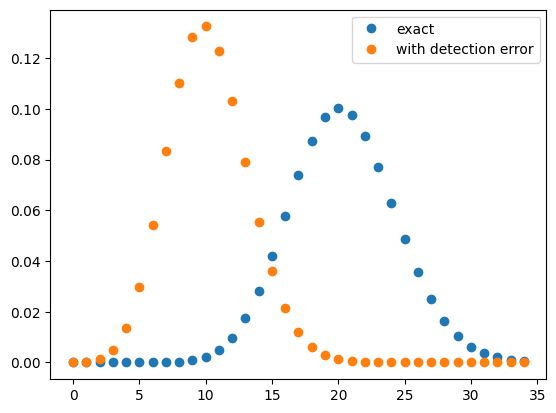

In [37]:
x = np.arange(0,35)
p_s = [p_to_measure_n(x_i, mu, nu, lambd) for x_i in x]
p_s_good = [p_to_measure_n(x_i, mu, nu, 1) for x_i in x]
plt.plot(x, p_s_good, "o", label="exact")
plt.plot(x, p_s, "o", label="with detection error")
print("good: ", mean_var_mandel_Q(p_s_good))
print("with detection error: ", mean_var_mandel_Q(p_s))
plt.legend()
plt.show()